In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random

import time

Creazione del grafo con l'algoritmo di Barabasi-Albert

In [2]:
N = 50
P = 0.25
G = nx.erdos_renyi_graph(N, P)

while min([d for n, d in G.degree()]) == 0:
    G = nx.erdos_renyi_graph(N, P)

Rappresentazione del grafico

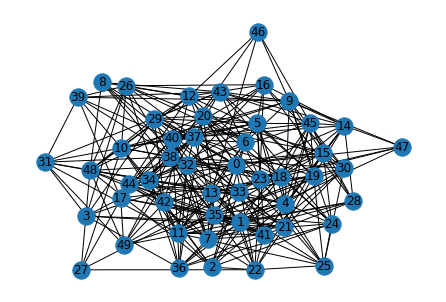

In [3]:
nx.draw(G, with_labels=True)
plt.show()

Estrazione della matrice di adiacenza A

In [4]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)] 
    for c in b : 
        A[a][c] = 1

Estrazione della matrice di stocastica P e calcolo dei suoi autovalori e autovettori

In [5]:
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a]

In [6]:
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)
pS = autovettoriP[0]
if pS[0] < 0:
    pS = -pS
#np.dot(np.transpose(matrix),autovettori[0])

In [7]:
autovaloriP

array([ 1.        ,  0.43997597,  0.43216127, -0.47378473, -0.4503276 ,
       -0.4263921 ,  0.37128048,  0.36316393, -0.39518364, -0.38639988,
        0.32680304,  0.3016908 , -0.35019089,  0.28531176,  0.27224832,
       -0.32036817, -0.30166423, -0.29174469,  0.24642857,  0.2352051 ,
        0.21558119,  0.1888553 ,  0.17417695,  0.16119306, -0.25635924,
       -0.25119537,  0.14140024,  0.12408399,  0.11608553, -0.2281974 ,
       -0.20545605, -0.19643593, -0.19032121, -0.17027588, -0.15662906,
        0.07835526,  0.06669011,  0.05518114,  0.04680174, -0.13702385,
       -0.11592309, -0.09379563, -0.08903522,  0.01677689,  0.00543911,
       -0.05406133, -0.05181494, -0.01726327, -0.02433449, -0.03071186])

Definizione della matrice laplaciana L e calcolo dei suoi autovettori e autovalori

In [8]:
matrixL = np.identity(N) - matrixP

In [9]:
autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)
pS_L = autovettoriL[0]
if pS_L[0] < 0:
    pS_L = -pS_L

In [10]:
autovaloriL

array([8.84430329e-17, 5.60024034e-01, 5.67838730e-01, 1.47378473e+00,
       1.45032760e+00, 1.42639210e+00, 6.28719520e-01, 6.36836065e-01,
       1.39518364e+00, 1.38639988e+00, 6.73196962e-01, 1.35019089e+00,
       6.98309198e-01, 7.14688238e-01, 1.32036817e+00, 7.27751684e-01,
       7.53571428e-01, 7.64794897e-01, 7.84418813e-01, 1.30166423e+00,
       1.29174469e+00, 8.11144695e-01, 1.25635924e+00, 1.25119537e+00,
       8.25823049e-01, 8.38806942e-01, 8.58599757e-01, 8.75916012e-01,
       8.83914469e-01, 1.22819740e+00, 1.20545605e+00, 1.19643593e+00,
       1.19032121e+00, 1.17027588e+00, 1.15662906e+00, 9.21644744e-01,
       9.33309887e-01, 9.44818864e-01, 9.53198256e-01, 1.13702385e+00,
       1.11592309e+00, 1.09379563e+00, 1.08903522e+00, 9.83223109e-01,
       9.94560887e-01, 1.05406133e+00, 1.05181494e+00, 1.01726327e+00,
       1.02433449e+00, 1.03071186e+00])

La distribuzione stazionaria e il valore di Fiedler estratto dalle due matrici L e P coincidono fino alla 13-esima cifra decimale

In [11]:
i = 13
np.round(pS, i) == np.round(pS_L, i)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
round(1-max(autovaloriP[1:]), i) == round(min(autovaloriL[1:]), i)

True

Definizione del valore valore di Fiedler e della distribuzione stazionaria approssimate

In [13]:
FiedlerValue = round(min(autovaloriL[1:]), i)
FiedlerValue

0.5600240339883

In [14]:
pS = np.round(pS, i)

Assegnazione degli individui ai nodi per l'evoluzione della dinamica. L'assegnazione degli individui è fatta secondo una distribuzione uniforme.

In [15]:
walker_per_node = 10

In [16]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[new_node] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[n]
    history += [evolution]

In [17]:
history = [[], [], []]
for h in range(len(history)):
    history[h] = [[walker_per_node] * len(G.nodes)]

time_steps = int(5e4)

In [18]:
t0 = time.time()

for h in range(len(history)):
    for n in G.nodes:
        G.nodes[n]['N_i'] = walker_per_node
    
    for t in range(time_steps):
        dynamic_evolution(G, history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 18 minutes and 25.461516618728638 seconds


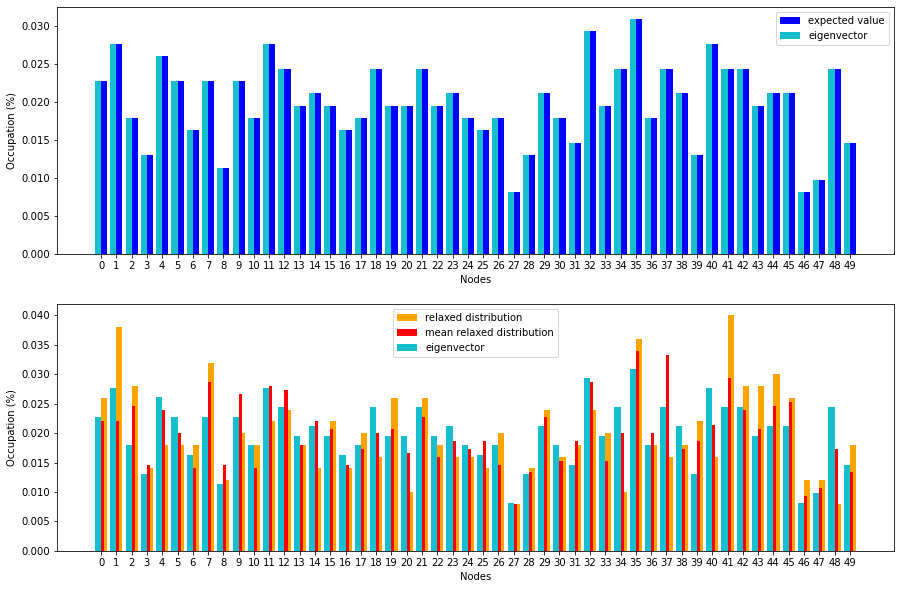

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.3*N, 10))

pSNorm = [d for n, d in G.degree()]
pSNorm = [h/sum(pSNorm) for h in pSNorm]

ax[0].bar(G.nodes, [h/sum(pSNorm) for h in pSNorm], width=0.4, align='edge', color='blue', label="expected value")
ax[0].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

ax[1].bar(G.nodes, [h/sum(history[0][-1]) for h in history[0][-1]], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax[1].bar(G.nodes, [(h1+h2+h3)/(sum(history[0][-1]) + sum(history[1][-1]) + sum(history[2][-1]))
                    for h1, h2, h3 in zip(history[0][-1], history[1][-1], history[2][-1])],
          width=0.2, align='edge', color='red', label='mean relaxed distribution')
ax[1].bar(G.nodes, [h/sum(pS) for h in pS], width=-0.4, align='edge', color='tab:cyan', label="eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)

plt.show()

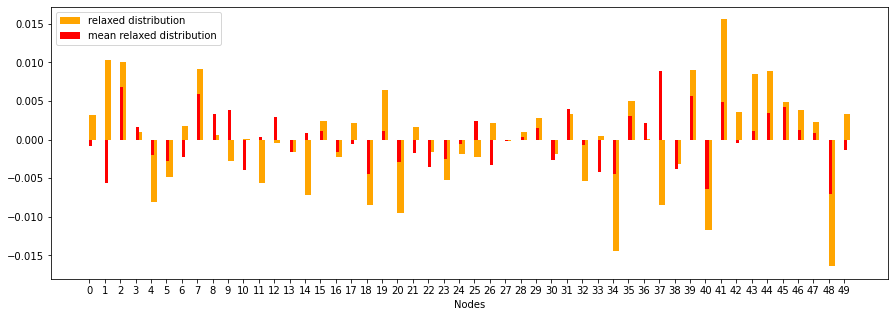

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(0.3*N, 5))

ax.bar(G.nodes, [h/sum(history[0][-1]) - k for h, k in zip(history[0][-1], pSNorm)], width=0.4, 
          align='edge', color='orange', label='relaxed distribution')
ax.bar(G.nodes, [(h1+h2+h3)/(sum(history[0][-1]) + sum(history[1][-1]) + sum(history[2][-1])) - k
                    for h1, h2, h3, k in zip(history[0][-1], history[1][-1], history[2][-1], pSNorm)],
          width=0.2, align='edge', color='red', label='mean relaxed distribution')

ax.legend()
ax.set_xlabel("Nodes")
# ax.set_ylabel("Occupation (%)")
ax.set_xticks(np.arange(0, N, 1))
# ax[i].grid(True)

plt.show()

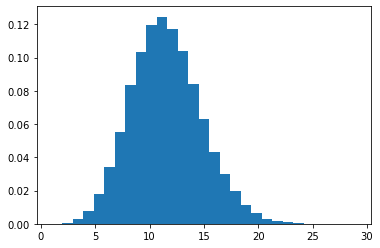

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

node = 5
p_node = [h[node] for h in history[0]]
plt.hist(p_node, bins = max(p_node), density = True)

plt.show()

In [22]:
print(sum(p_node)/time_steps)
print(pSNorm[node]*N*walker_per_node)

11.4022
11.400651465798045
